<a href="https://colab.research.google.com/github/vivekkumar2100/Seol_Bike_Sharing_Demand_Prediction/blob/main/Team_Notebook_Seoul_Bike_Sharing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### **Project Type**    - Regression / Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Abhinov Anand
##### **Team Member 2 -** Vivek Kumar
##### **Team Member 3 -** Suraj Kumar
##### **Team Member 4 -** Saurav Kumar

Github link - https://github.com/vivekkumar2100/Seol_Bike_Sharing_Demand_Prediction

# **Project Name**    - **SEOUL BIKE SHARING DEMAND PREDECTION**



Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. Data Description The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information. Attribute Information

# Variables

**Date** : year-month-day

**Rented Bike count** - Count of bikes rented at each hour

**Hour** - Hour of he day

**Temperature**-Temperature in Celsius

**Humidity**- %

**Windspeed** - m/s

**Visibility** - 10m

**Dew point temperature** - Celsius

**Solar radiation** - MJ/m2

**Rainfall** - mm

**Snowfall** - cm

**Seasons** - Winter, Spring, Summer, Autumn

# **INTRODUCTION**

This is the problem related to the regression prediction where we have to predict continuous target variable that is rented bike sales using the different independent variables related to the atmospheric condition.

Here we ll follow few norms for systemizing the approach to find the best prediction.

1-Data Exploration and analysing pattern of relation among different variables.

2-Removing outliers and dropping correlating variables.

3-Defining target variables and features variables

4-Splitting the data for training and testing.

5-Choosing the different model like linear regression,random forest regression,polynomial regression.

6-Fitting the data and predicting result

7-Evaluation of the result using different metrics like Mean Squared Error,R2_score etc.

8-HyperParameterTuning using Lasso,Ridge,Grid Search CV

9-Comparing different model with the help of metrics.

10-Analysing importance of different features in prediction(Model Explainability).
11-Conclusion

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

Reading the file.

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path ='/content/drive/MyDrive/Almabetter/Capstone Project -2/'

In [ ]:
df=pd.read_csv(path+'SeoulBikeData.csv',encoding='unicode_escape') #Reading Dataset

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

Number of row=8760

Number of columns=14

### Dataset Information

In [ ]:
# Dataset Info
df.info

<bound method DataFrame.info of             Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])


0

No Duplicate Values.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum().sum()

0

No Missing Values.

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

# Exploratory Data Analysis

In [ ]:
# Dataset Describe
df.describe(include='all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

After looking at the mean,max,stadard it looks like it might contain many outliers.

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Density'>

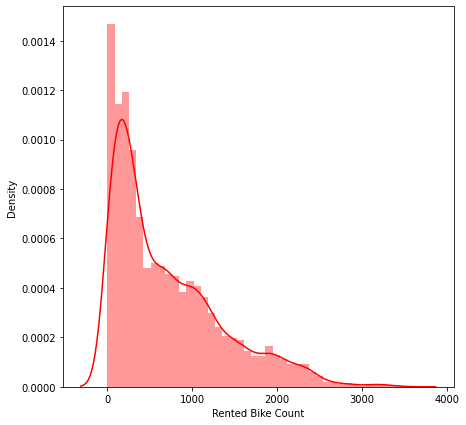

In [ ]:
#Dependent variable 'Rented Bike Count
plt.figure(figsize=(7,7))
sns.distplot(df['Rented Bike Count'],color='r')

After plotting the Density plot of number of rented bike,we can see that majority is in between 100 to 1200 rented bikes with an outliers upto 3500.

The density plot is positively skewed thus needs transformation for normalising the distribution of data.

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df['Rented Bike Count'].skew())
print("Kurtosis: %f" % df['Rented Bike Count'].kurt())

Skewness: 1.153428
Kurtosis: 0.853387


Here skewness is 1.168 while the kurtosis is 0.862.

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Density'>

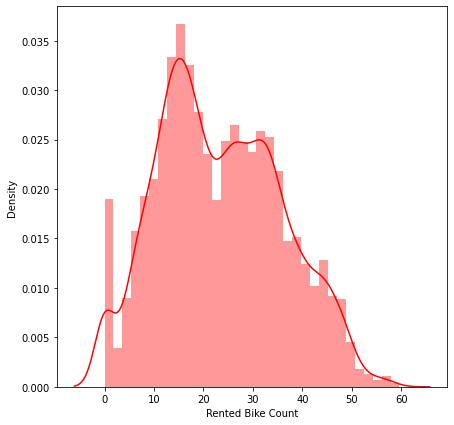

In [ ]:
#Reducing Skewness by root squaring target variables.
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['Rented Bike Count']),color='r')

In [ ]:
#skewness and kurtosis
print("Skewness after transformation: %f" % np.sqrt(df['Rented Bike Count']).skew())
print("Kurtosis after transformation: %f" % np.sqrt(df['Rented Bike Count']).kurt())

Skewness after transformation: 0.237362
Kurtosis after transformation: -0.657201


After root squaring the target variable,we are able to reduce the Skewness to 0.25 and Kurtosis to -0.64.

*Analysing the correlation between different numerical variables.*

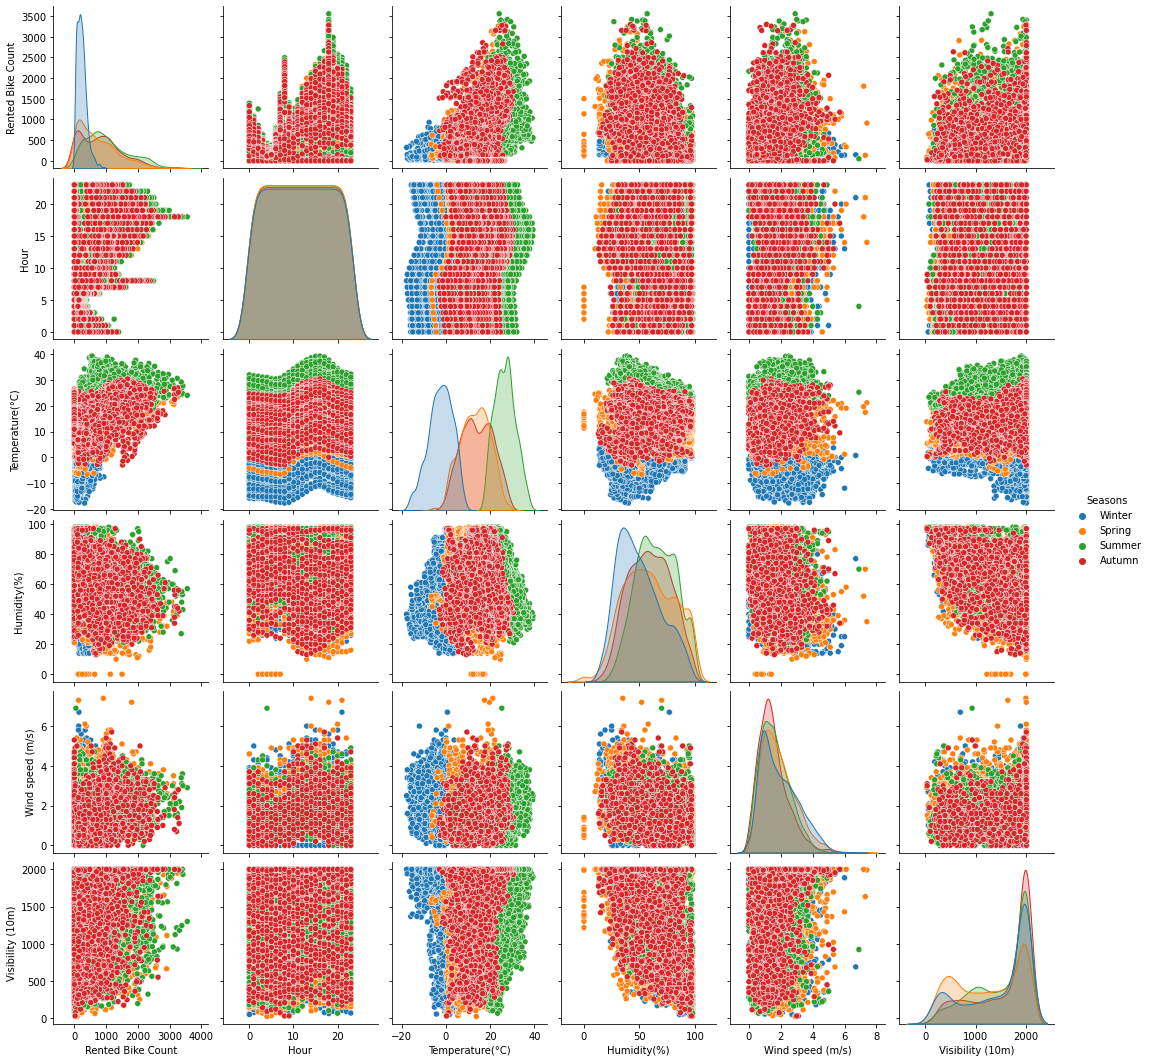

In [ ]:
#Relation Between Two Numerical Variables
sns.pairplot(df,vars=['Rented Bike Count','Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)',], hue='Seasons')


*First we need to convert the Date columns from string to date time format for data processing.*

In [ ]:
# Write your code to make your dataset analysis ready.
#Convert the Date column in Datetime Dtype
df['Date']=pd.to_datetime(df['Date'])

#Breaking Down the Date into 3 Components
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [ ]:
df.drop(['Date'],axis=1,inplace=True) #Removing Date Column

In [ ]:
df.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Year'],
      dtype='object')

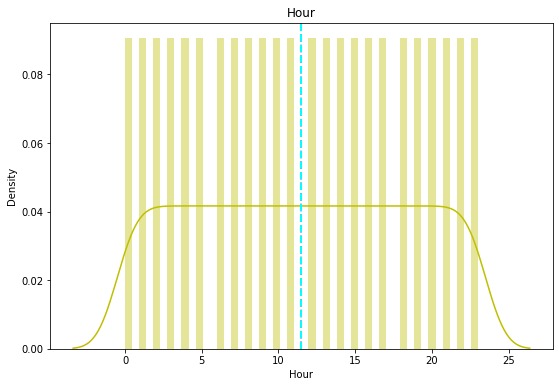

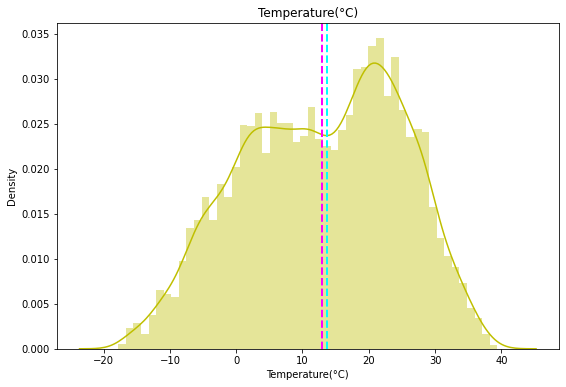

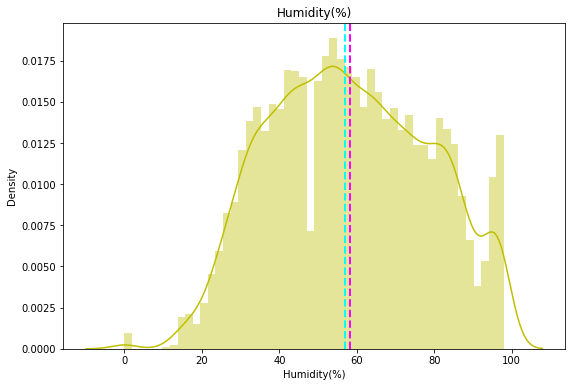

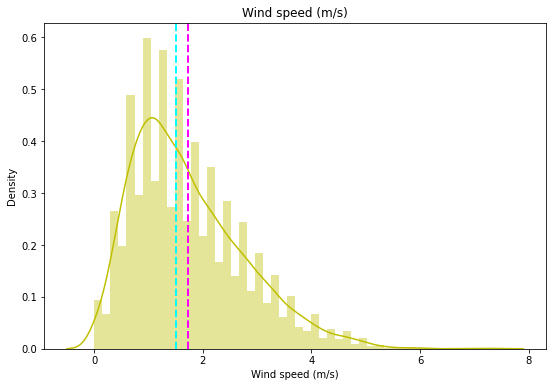

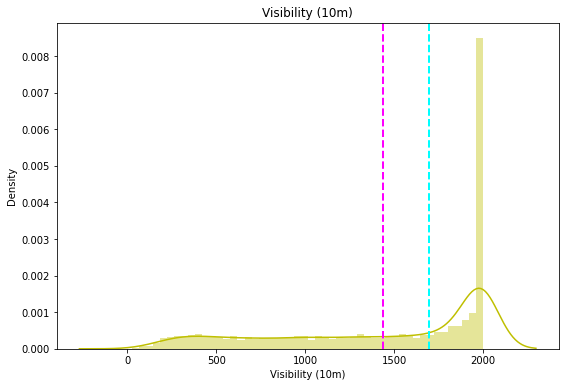

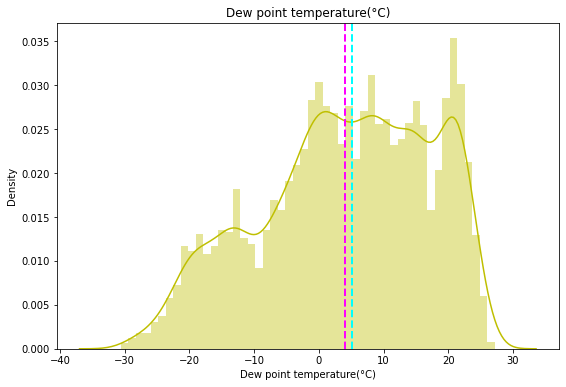

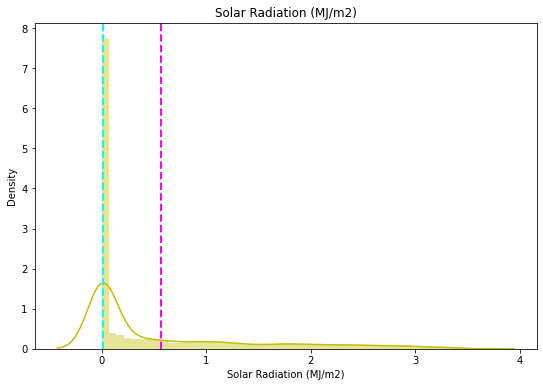

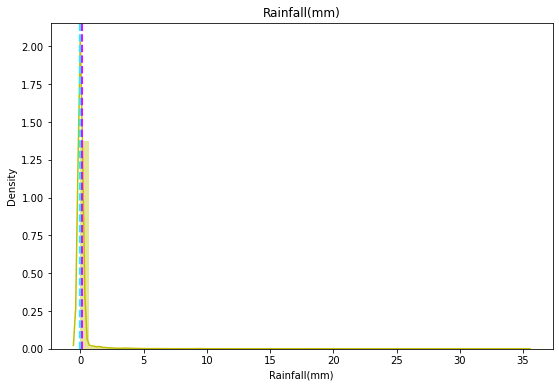

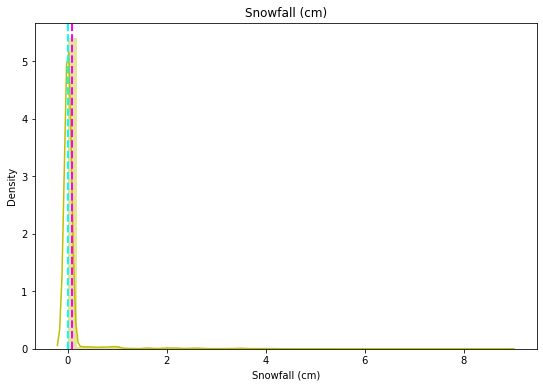

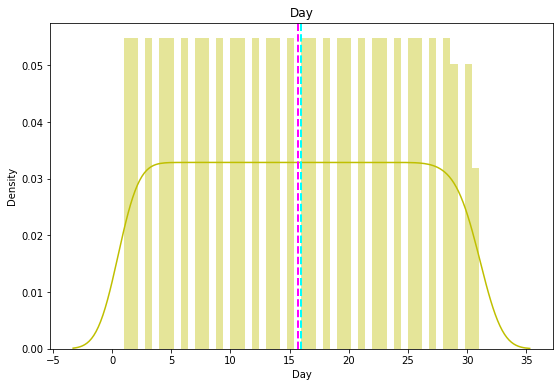

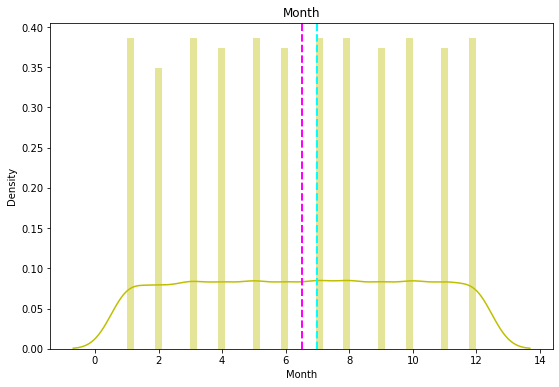

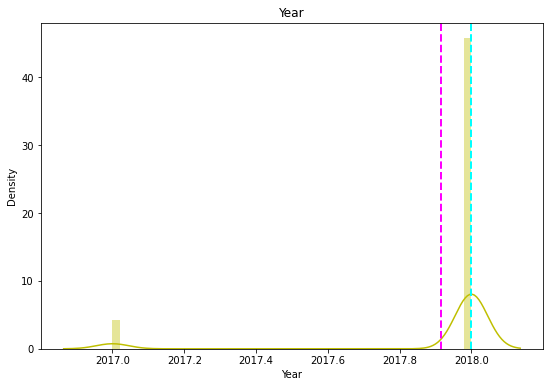

In [ ]:
# Chart - 1 visualization code
#Vizualizing Density of various features
numerical_features=df.describe().columns
for col in numerical_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(feature,bins=50, ax = ax,color='y')
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

*By analyzing the density plot of different numerical features,it can be concluded tha*t-

Feature with near normal distribution are-
  
    1-Temperature-(mean-13 degree celcius)

    2-Humidity-(mean-58%)


Feature with skewed distribution are-

    1-Wind Speed-(Mean-1.62 m/s)
   
    2-Visibility-(Mean-1434 10m)

    3-Solar Radiation-(Mean-0.5 MJ/m2)

    4-Rainfall-(Mean-0.1 mm)

    5-Snowfall-(Mean-0.064 cm)

*Analysing the relation of Number of Rented Bike with respect to different numerical features*.

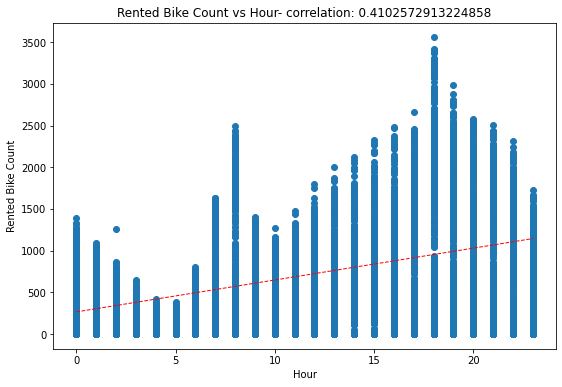

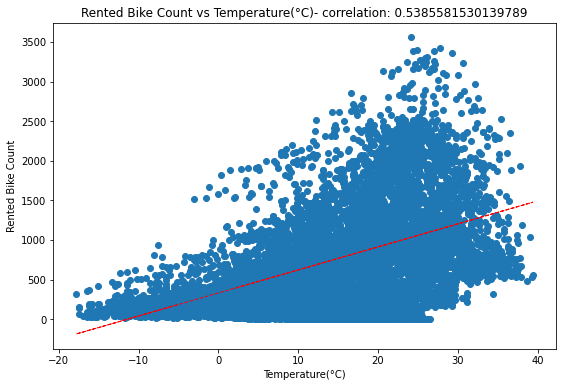

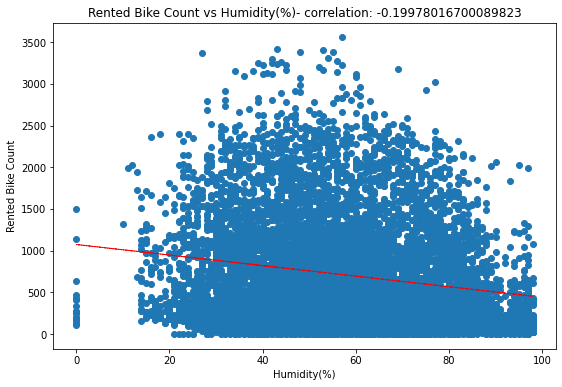

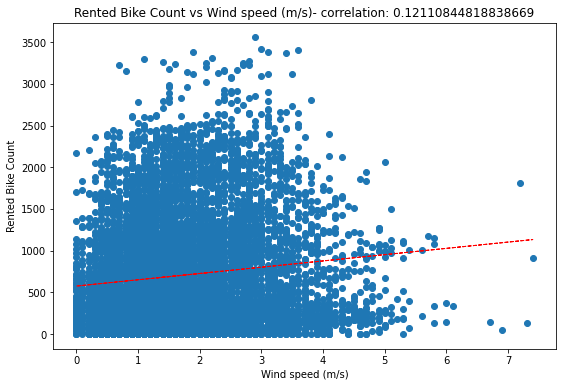

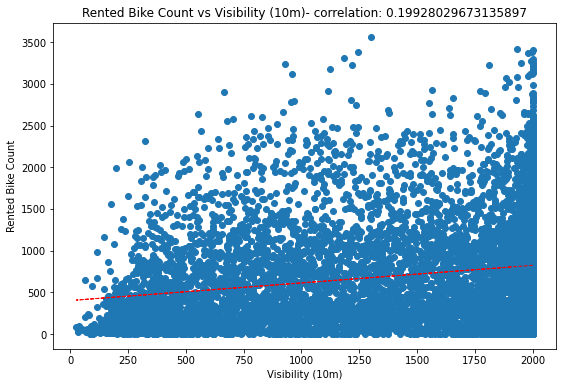

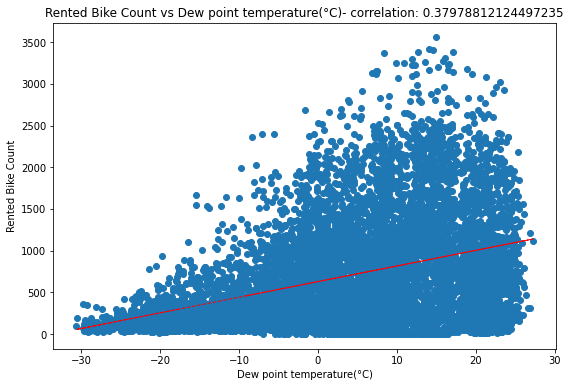

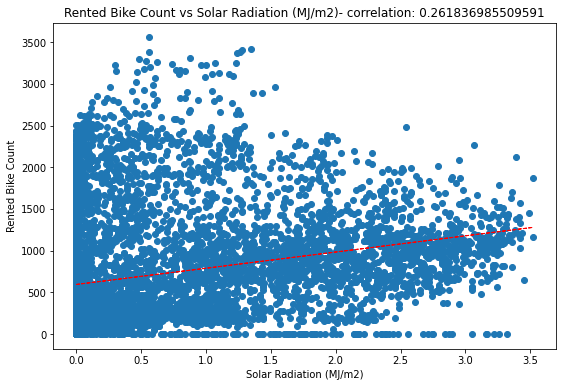

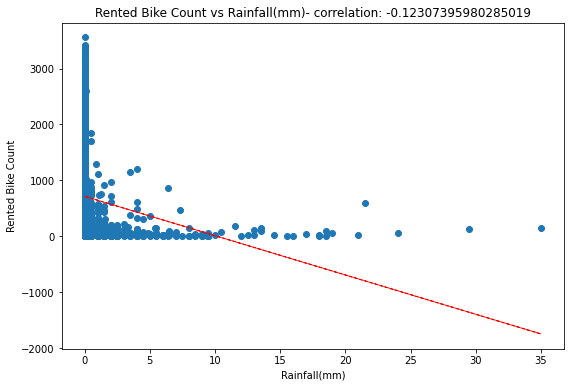

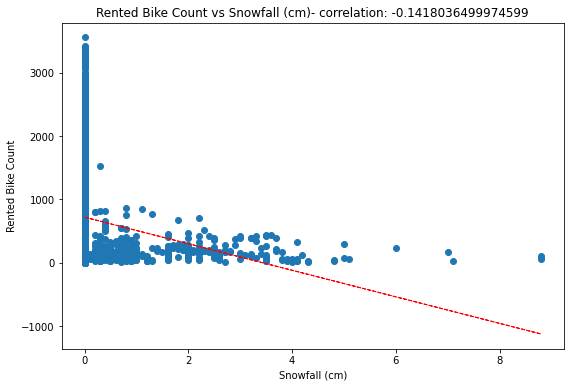

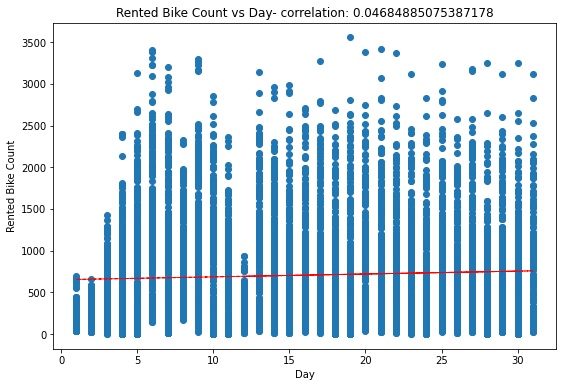

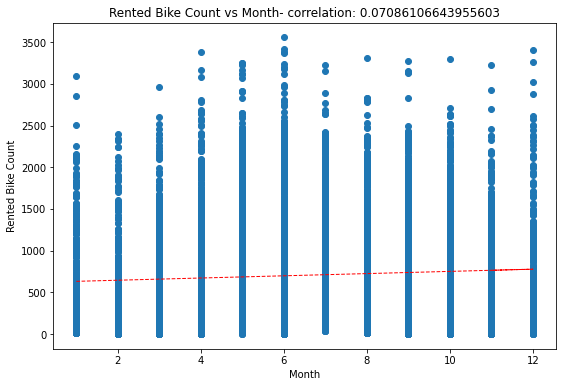

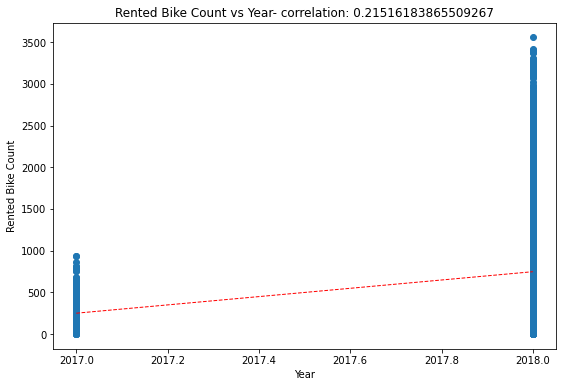

In [ ]:
# Chart - 2 visualization code
#Visualizing Relation of Dependent Variable with numerical independent features
for col in numerical_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

Conclusion-

    1-Most number of bikes rented in between 15 and 20 hrs which shows evening period sees higher demand.
    2-Temperature having 20 to 30 degree celcius sees highest demand of rental bikes(Automn or Summer season).
    3-Humidity with 40 to 70 % with maximum demand.
    4-Lower wind speed increases the demand of Rental Bike.
    5-Demand of rental bikes increased with higher visibility.
    6-Higher dew point temperature with greater demand of Rental Bikes.
    7-Demand decreases with higher Solar Radiations.
    8-Demand decreases during higher Rainfall and Snowfall.

# Data Preprocessing

In [ ]:
#Removing Outliers
df=df[df['Wind speed (m/s)']<=4]
df=df[df['Visibility (10m)']>=100]
df=df[df['Solar Radiation (MJ/m2)']<=3]
df=df[df['Rainfall(mm)']<=10]
df=df[df['Snowfall (cm)']<=4]

*Analyzing the relation between rental bike count and numerical features*

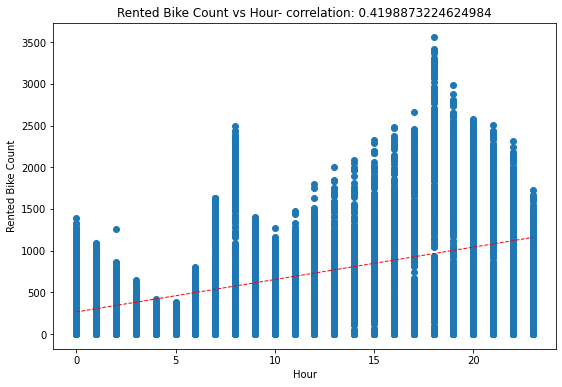

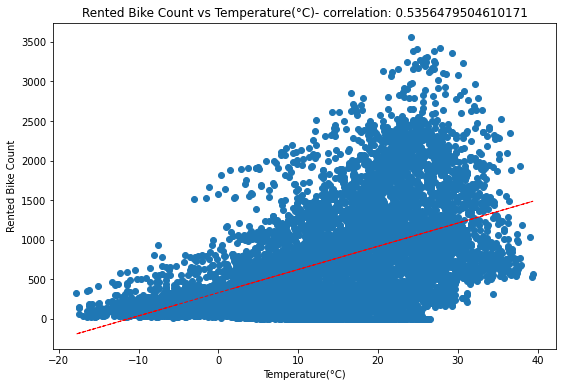

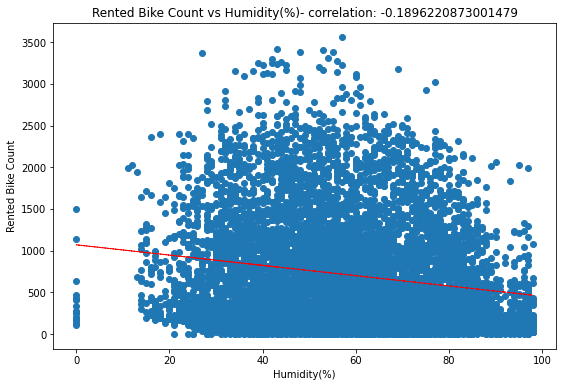

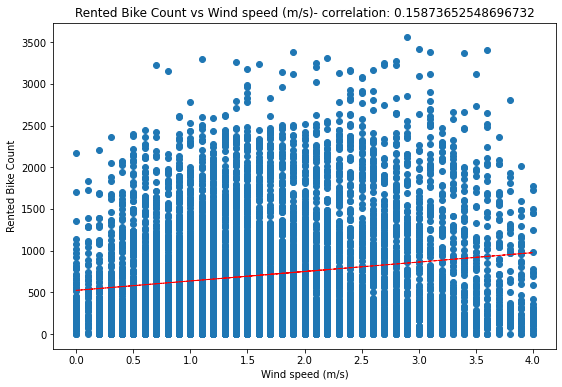

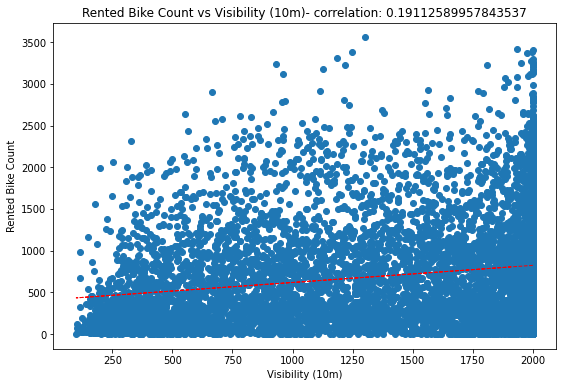

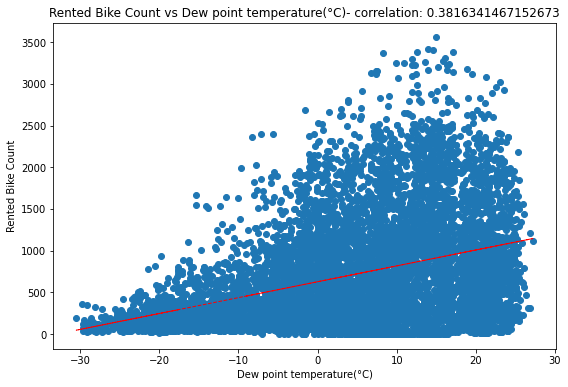

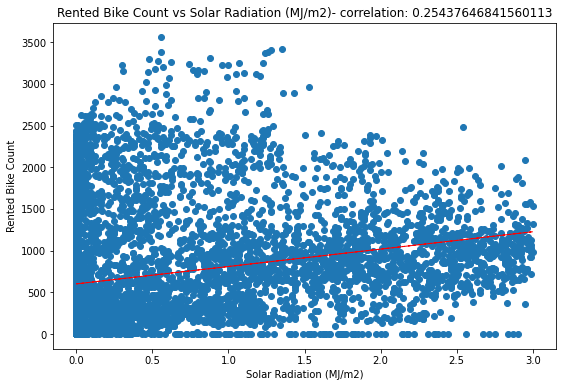

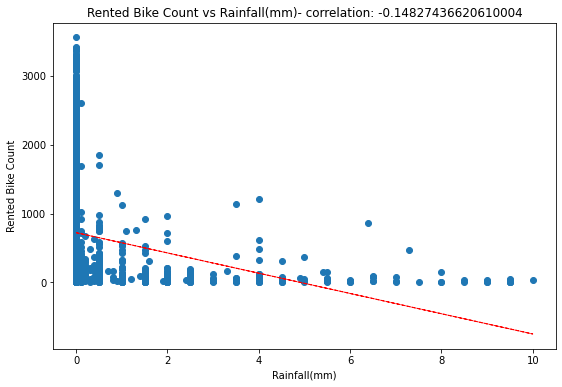

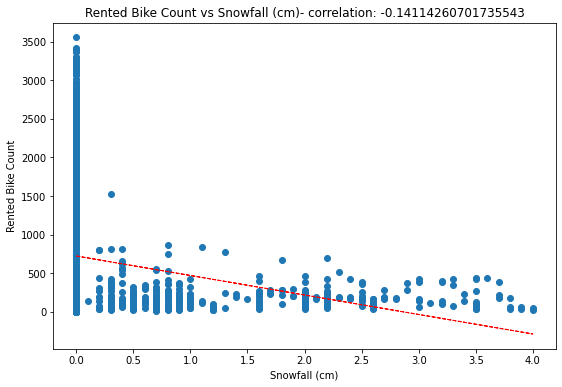

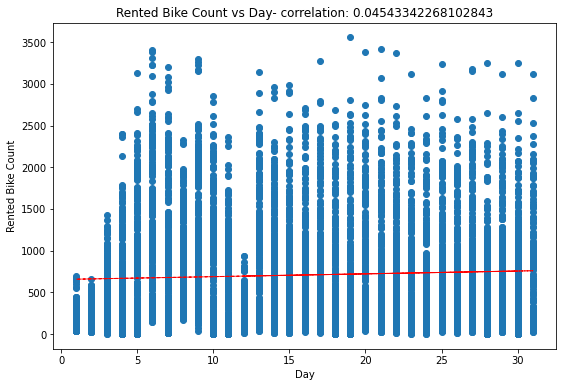

In [ ]:
# Chart - 2 visualization code
#Vizualizing Relation between categorical features with Dependent Variables
for col in numerical_features[1:-2]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

 *Analysing Categorical features*

In [ ]:
df['Seasons'].value_counts()

Autumn    2132
Summer    2099
Spring    2037
Winter    2026
Name: Seasons, dtype: int64

It can be seen that rental bikes are available evenly in different seasons.

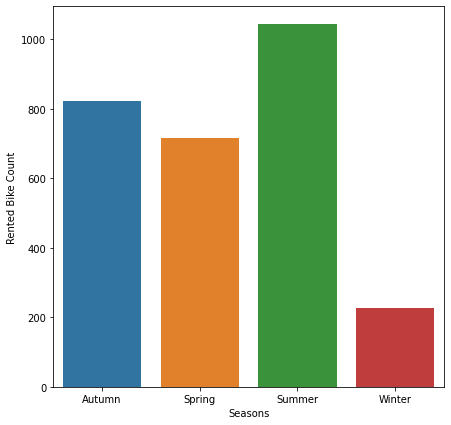

In [ ]:
# Chart - 3 visualization code
#ploting Number of Rented bike in different Seasons
bike_rented_per_season=df.groupby(['Seasons'])['Rented Bike Count'].mean()
plt.rcParams['figure.figsize']=(7,7)
sns.barplot(y=bike_rented_per_season,x=bike_rented_per_season.index,data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

We can see that demand of Rental Bikes are higher in Automn and Summer Season with average 800 and 1050 respectively while the Winter seen the list minimum demand of nearly 200.

In [ ]:
df['Holiday'].value_counts()

No Holiday    7891
Holiday        403
Name: Holiday, dtype: int64

Here data show the clearly working days are much more than Holidays.

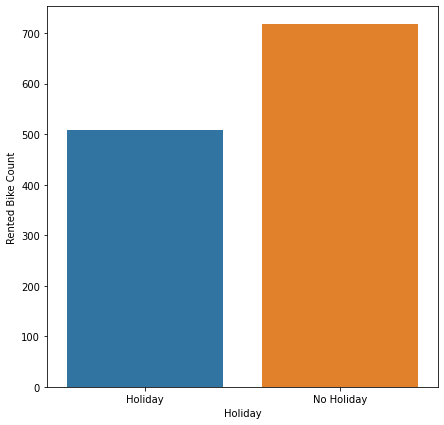

In [ ]:
#Visualizing Number of Rented Bike on the Basis of Holiday
bike_rented_on_holiday=df.groupby(['Holiday'])['Rented Bike Count'].mean()
plt.rcParams['figure.figsize']=(7,7)
sns.barplot(y=bike_rented_on_holiday,x=bike_rented_on_holiday.index,data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

From the bar chart ,it can be clearly seen that demand of Rental bikes are more on working days.

In [ ]:
df['Functioning Day'].value_counts()

Yes    8016
No      278
Name: Functioning Day, dtype: int64

Here we can be seen that Functioning Days are much more than the non functioning days.

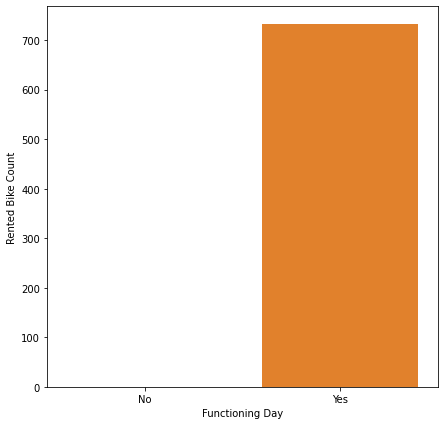

In [ ]:
bike_rented_on_functioning_day=df.groupby(['Functioning Day'])['Rented Bike Count'].mean()
plt.rcParams['figure.figsize']=(7,7)
sns.barplot(y=bike_rented_on_functioning_day,x=bike_rented_on_functioning_day.index,data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

*Analysing the correlation among different variables.*

<AxesSubplot:>

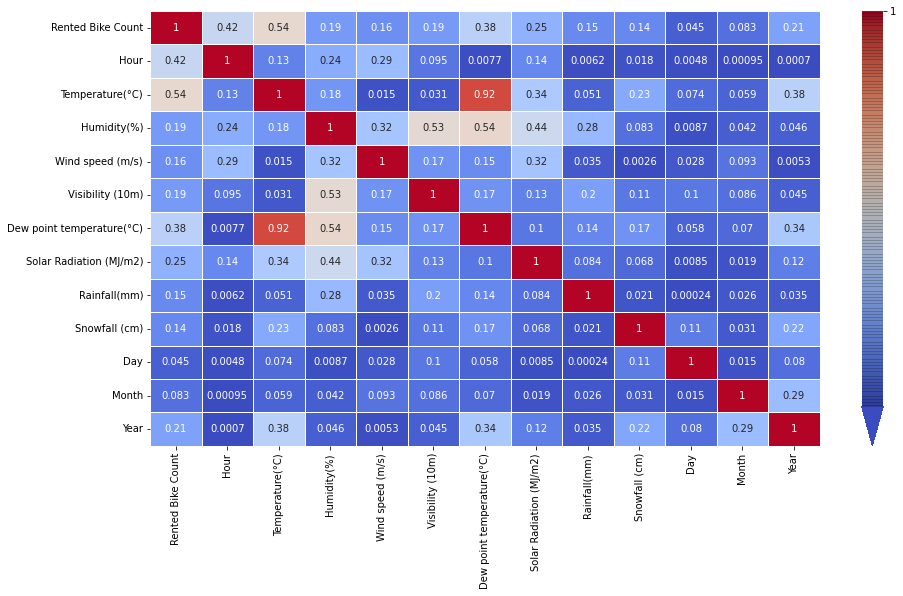

In [ ]:
# Chart - 4 visualization code
#Visualizing the correlation among different variable
plt.figure(figsize=(15,8))
cbar_kws = { 
            "shrink":1,
            'extend':'min', 
            'extendfrac':0.1, 
            "ticks":np.arange(0,22), 
            "drawedges":True,
           }
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm',linewidth=1,cbar_kws=cbar_kws)

From the heatmap it can be seen that-

    1-Majority of the features are not correlated with each others.

    2-Temperature has the highest correlation with Dew Point Temperatures.

    3-While humidity is also highly correlated with visibility.

Identifying correlating variables with the help of variance inflation factor to get clear pictures..

In [ ]:
#Treating Correlating Variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
  vif=pd.DataFrame()
  vif['variable']=x.columns
  vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  return (vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Day','Month','Year']]])

variable        vif
0                       Hour   4.284826
1            Temperature(°C)  33.527555
2                Humidity(%)   5.622824
3           Wind speed (m/s)   5.232007
4           Visibility (10m)   9.053830
5  Dew point temperature(°C)  17.385653
6    Solar Radiation (MJ/m2)   2.662726
7               Rainfall(mm)   1.120678
8              Snowfall (cm)   1.125476

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Day','Month','Year','Dew point temperature(°C)']]])

variable       vif
0                     Hour  3.827394
1          Temperature(°C)  3.186630
2              Humidity(%)  5.101738
3         Wind speed (m/s)  4.971409
4         Visibility (10m)  4.780098
5  Solar Radiation (MJ/m2)  2.115374
6             Rainfall(mm)  1.117794
7            Snowfall (cm)  1.125261

Removing the Dew Point Temperature.

In [ ]:
df.drop(['Dew point temperature(°C)'],axis=1,inplace=True)

In [ ]:
numerical_features=['Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','	Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

Let see,the correlation between variables after its treatment.

<AxesSubplot:>

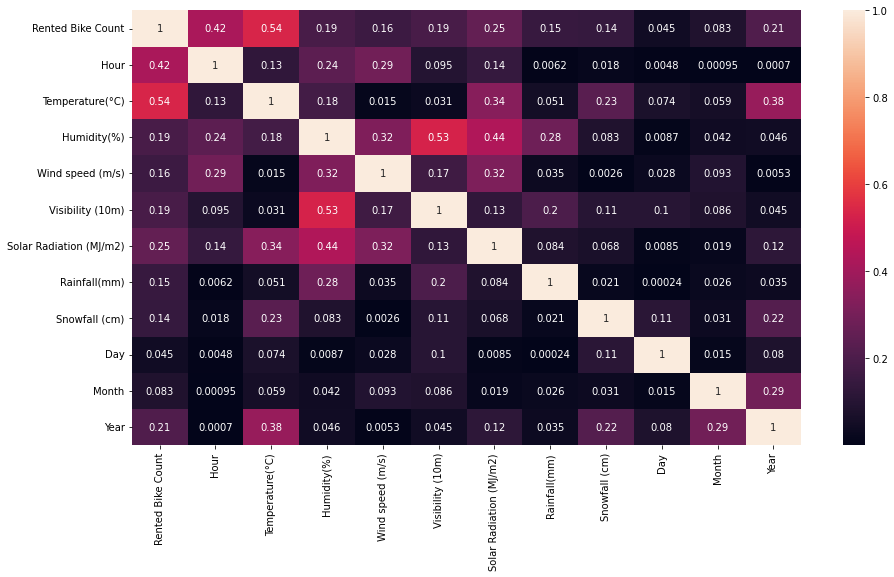

In [ ]:
#Visualizing Correlation after treatment
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True)

In [ ]:
categorical_features=df.describe(include=['object','category']).columns

In [ ]:
numerical_features

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 '\tSolar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

*Analysing the number of rented bike with respect to the different categorical features.*

First of all we ll plot the boxplot and analyse the density as well as outliers.

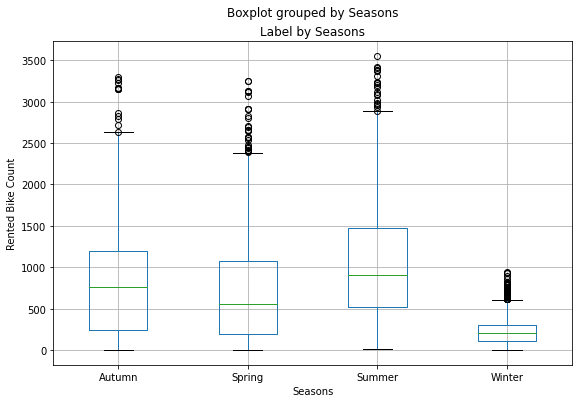

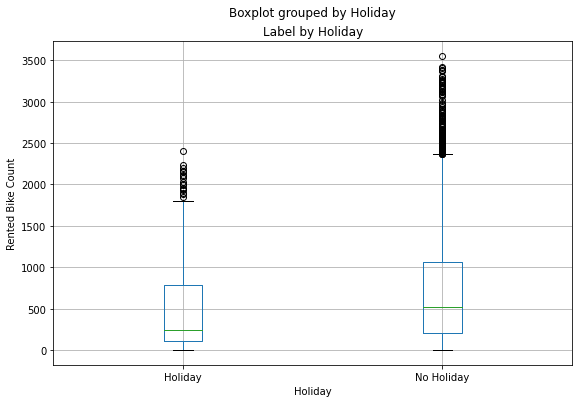

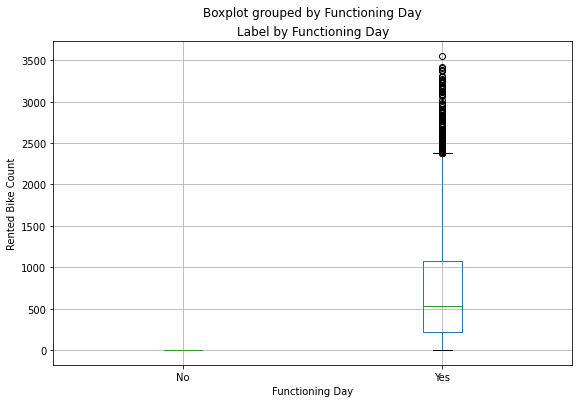

In [ ]:
#Visualizing outlier through Boxplot
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

After vizualisation we can conclude that-

    1-Maximum demand density of rental bike is in Automn and Summer.
    2-Above features have higher density of outliers,thus removing them could cause the major data lost.

*Encoding the Categorical Data*

Encoding ll help to process the categorical data by assigning them a numerical values.

In [ ]:
#Encoding the categorical variables
df_pr=df.copy()
def encoder(data,columns):
  data=pd.concat([data,pd.get_dummies(data[columns],prefix=columns,drop_first=True)],axis=1)
  data=data.drop([columns],axis=1)
  return data

for col in categorical_features:
  df_pr=encoder(df_pr,col)
df_pr.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Day  Month  Year  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0   12      1  2017               0               0               1   
1   12      1  2017               0               0               1   
2   12      1  2017               0               0               1   
3   12      1  2017               0               0               1   
4   12      1  2017               0               0               1   

   Holiday_No Holiday  Functioning Day_Yes  
0                   1                    1  
1                   1                    1  
2                   1                    1  
3                   1                    1  
4                   1                    1

In [ ]:
df_pr.drop(['Day','Year'],axis=1,inplace=True)

In [ ]:
df_pr.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Month  Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0      1               0               0               1                   1   
1      1               0               0               1                   1   
2      1               0               0               1                   1   
3      1               0               0               1                   1   
4      1               0               0               1                   1   

   Functioning Day_Yes  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

## **ML Model Implementation***

Now we ll apply various the Models like-Linear Regression,Random Forest Regression and Polynomial Regression and then after evaluate the results.

*Assigning and Splitting the data for training and testing:*

In [ ]:

# ML Model - 1 Implementation
x=df_pr.iloc[:,1:]
y=np.sqrt(df_pr.iloc[:,:1])


# Fit the Algorithm
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)

(6220, 14)
(2074, 14)


*Scaling the data*

It help out to get rid of impact of the difference in magnitude of the different features.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

`

### ML Model - 1-Linear Regression

*Implementation*

In [ ]:
#Implementation
reg=LinearRegression().fit(x_train,y_train)

*Model features*

In [ ]:
reg.score(x_train,y_train) 

0.6569562746922146

In [ ]:
reg.intercept_

array([-14.72091508])

In [ ]:
reg.coef_ #coefficient of parameter

array([[ 11.73241766,  27.22094418, -14.62091948,   1.83189474,
         -0.19318028,  -2.92984416, -32.56436087,   0.92055873,
          0.96778471,  -2.92405102,  -2.48383172,  -8.06933593,
          2.54911072,  28.20450994]])

*Prediction using the model*

In [ ]:
#Prediction
y_train_pred=reg.predict(x_train)
y_test_pred=reg.predict(x_test)

*It's performance using Evaluation metric Score Chart.*




In [ ]:
from sklearn.metrics import mean_absolute_error
# Visualizing evaluation Metric Score chart
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse=mean_squared_error(((y_test)**2),((y_test_pred)**2)) 
print('MSE',mse)

mae=mean_absolute_error(((y_test)**2),((y_test_pred)**2))
print('MAE',mae)

rmse=np.sqrt(mse)
print('RMSE',rmse)

r2=r2_score(((y_test)**2),((y_test_pred)**2))
print('R2',r2)
print("Adjusted R2 : ",1-(1-r2_score(((y_test)**2), ((y_test_pred)**2)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE 151265.56001222247
MAE 257.7629507878065
RMSE 388.92873384750385
R2 0.6081958418918241
Adjusted R2 :  0.6055318019629681


Here R2_Score is nearly 61% which is very less and generally not acceptable and need further tuning and transformation.

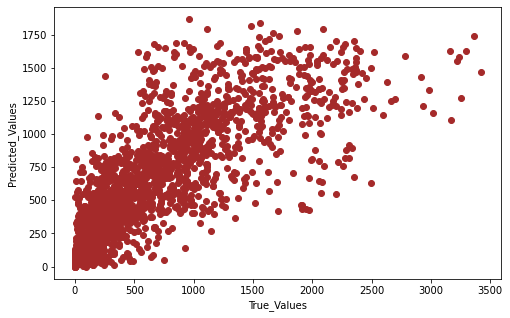

In [ ]:
#Visualizing the relation between the predicted value and actual values.
plt.figure(figsize=(8,5))
plt.scatter((y_test**2),((y_test_pred)**2),color='brown')
plt.xlabel('True_Values')
plt.ylabel('Predicted_Values')
plt.show()

From the above scatter plot,we can see that higher values giving more sparse values pointing toward the higher error.

It shows that model is working well for lower values.

In [ ]:
error=((y_test)**2)-((y_test_pred)**2)

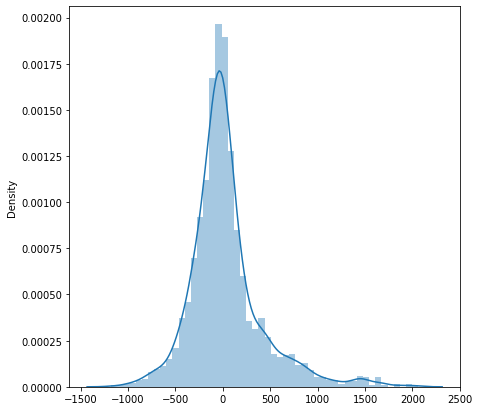

In [ ]:
sns.distplot(error)
plt.show()

The above density plot shows the normal distribution of the error,which shows majority of the prediction are having low error.

# Cross- Validation & Hyperparameter Tuning



Now we ll try to penalise the coffiecient parameters to reduce the error.

Here we ll use three method that are Lasso Regression,Ridge Regression and Elastic Regression and Cross validate them

*Lasso Regression*

In [ ]:
#Hyperparameter Tuning using Lasso Regression
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.0001,max_iter=8000)
lasso.fit(x_train,y_train) #fitting model

Lasso(alpha=0.0001, max_iter=8000)

In [ ]:
lasso.score(x_train,y_train)

0.6569562160212137

In [ ]:
lasso.coef_

array([ 11.73345034,  27.20577975, -14.61178642,   1.82808194,
        -0.18874003,  -2.92187376, -32.54220667,   0.90418725,
         0.96740809,  -2.92189719,  -2.47955089,  -8.06884373,
         2.54663784,  28.1995743 ])

*Cross Validation*

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#Implementing Cross Validation
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train,y_train) #Fitting the model

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

*Best Lasso Parameter*

In [ ]:
#Analysing optimal parameter
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -54.543029485859016


*Prediction through Lasso on test data*

In [ ]:
#Predicting through model
y_pred_lasso=lasso_regressor.predict(x_test) # Prediction on test data

*Analysing ERROR*



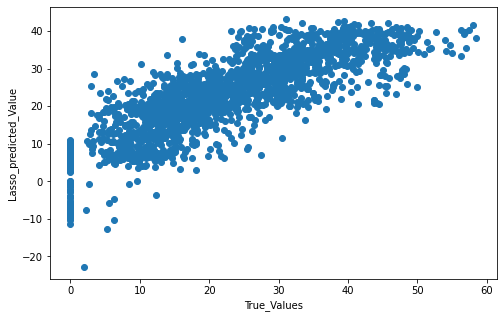

In [ ]:
#Visualizing the accuracy of Predicted value with True Value
plt.figure(figsize=(8,5))
plt.scatter(((y_test)),np.array(y_pred_lasso))
plt.xlabel('True_Values')
plt.ylabel('Lasso_predicted_Value')
plt.show()

After visualizing the above ScatterPlot ,we can see increase in linearity of the relationship between True Values and Predicted Values which shows the reduction in error compared to simple Linear Regression Model.

*Evaluation of Lasso Model*

In [ ]:
#Evaluation of Lasso Model
MSE  = mean_squared_error(((y_test)**2), (y_pred_lasso)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(((y_test)), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(((y_test)), (y_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 151383.98604043454
RMSE : 389.08095049800954
R2 : 0.6700152892767595
Adjusted R2 :  0.6677715855613027


Here increase in accuracy can be seen with increase in R2_Score to 67%

Ridge Regression

In [ ]:
#Hyperparameter tuning using Ridge Regression
from sklearn.linear_model import Ridge
parameters={'alpha' : [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.1]}
ridge_regressor=GridSearchCV(Ridge(),parameters,scoring='neg_mean_squared_error',cv=3)
ridge_regressor.fit(x_train,y_train) #Fitting the model

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 0.1]},
             scoring='neg_mean_squared_error')

*Best Parameter on Ridge Regression*

In [ ]:
#Analysing the optimal parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -54.498076363828034


*Prediction using Ridge Regression*

In [ ]:
#Prediction using Ridge Regression
y_pred_train_ridge=ridge_regressor.predict(x_train) #prediction on training data

*Evaluation of Ridge Regression*

In [ ]:
#Evaluation of model(Ridge)
MSE  = mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_train)**2, (y_pred_train_ridge)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_pred_train_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 54.2270555464549
RMSE : 7.363902195606274
R2 : 0.5879602468370758
Adjusted R2 :  0.654623771084414


On train data,the R2_Score is nearly 58%.

In [ ]:
y_pred_ridge=ridge_regressor.predict(x_test) #Prediction on test data

In [ ]:
#Evaluating model
lr_MSE  = mean_squared_error(((y_test)**2), (y_pred_ridge)**2)
print("MSE :" , MSE)

lr_RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

lr_r2 = r2_score(((y_test)**2),(y_pred_ridge)**2)
print("R2 :" ,lr_r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 54.2270555464549
RMSE : 7.363902195606274
R2 : 0.6081874007361114
Adjusted R2 :  0.667722775036558


On test data,here the R2_Score on test is nearly 60% lesser than Lasso Regression.

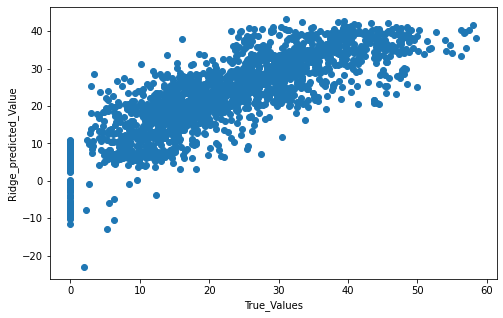

In [ ]:
#Visualizing the accuracy of Predicted value with True Value
plt.figure(figsize=(8,5))
plt.scatter((y_test),np.array(y_pred_ridge))
plt.xlabel('True_Values')
plt.ylabel('Ridge_predicted_Value')
plt.show()

Here we can see from the above Scatter plot is decrease in density compared to the Lasso Regression which point toward the decrease in Accuracy.

*ElasticNet*

In [ ]:
#HyperparameterTuning using ElasticNet
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(x_train,(y_train)) #Fitting the model

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(x_train, (y_train)) #Evaluating the model

0.5071299839634926

In elasticnet,we are getting even worse R2_Score with nearly 50% means least accuracy.

From the above evaluation,we can derive that Lasso Regression is giving best result from different models of Hyper Tuning.

### ML Model - 2-Random Forest Classifier

*Implementation of Random Forest Classifier*

In [ ]:
# Implementation the model
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor() #Initializing the model
grid_search = GridSearchCV(estimator = rf, param_grid = {'n_estimators':[50,80,100],'max_depth':[3,5,7]}, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train,y_train) #fitting the model

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             verbose=2)

*Prediction using Random Forest Classifier*

In [ ]:
# predicting for both train and test
y_pred_train2=grid_search.predict(x_train) #Prediction with Train Data
y_pred_test2=grid_search.predict(x_test)  #Prediction with Test Data


*Evaluation of Random Forest Regressor*

In [ ]:
#Model Evaluation on Training set
print('The evaluation metric values for training set - Random ForestRegressor with GridSearchCV:')
print('The MAE of training set = ',mean_absolute_error(y_train, y_pred_train2))
print('The MSE of training set = ',mean_squared_error(y_train, y_pred_train2))
print('The R2_score of training set = ',r2_score(y_train, y_pred_train2))

The evaluation metric values for training set - Random ForestRegressor with GridSearchCV:
The MAE of training set =  3.176580424241752
The MSE of training set =  19.74066763792538
The R2_score of training set =  0.8751193067744468


In [ ]:
#Model Evaluation on testing set
rf_mae=mean_absolute_error(y_test**2, y_pred_test2**2)
rf_mse=mean_squared_error(y_test**2, y_pred_test2**2)
rf_r2=r2_score(y_test**2,y_pred_test2**2)

print('The evaluation metric values for test set - Linear regression:')
print('The MAE of test set = ',mean_absolute_error(y_test**2, y_pred_test2**2))
print('The MSE of test set = ',mean_squared_error(y_test**2, y_pred_test2**2))
print('The R2_score of test set = ',r2_score(y_test**2,y_pred_test2**2))

The evaluation metric values for test set - Linear regression:
The MAE of test set =  172.4122148470991
The MSE of test set =  77686.67029206768
The R2_score of test set =  0.7987779872196183


Here we are getting best good result with R2_Score 77% on test data,much better than the Lasso,Linear Regression

In [ ]:
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score

Text(0, 0.5, 'Predicted Values')

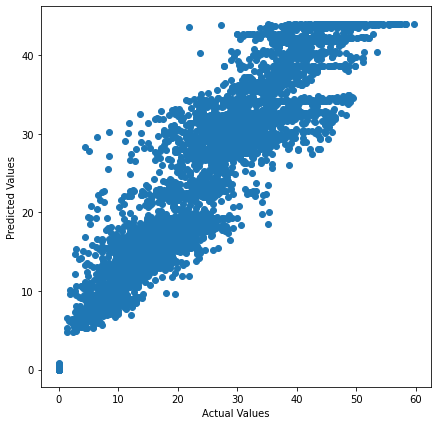

In [ ]:
#Visualizing the accuracy of predicted train data with respect to actual train data
plt.scatter(y_train,y_pred_train2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Text(0, 0.5, 'Predicted Values')

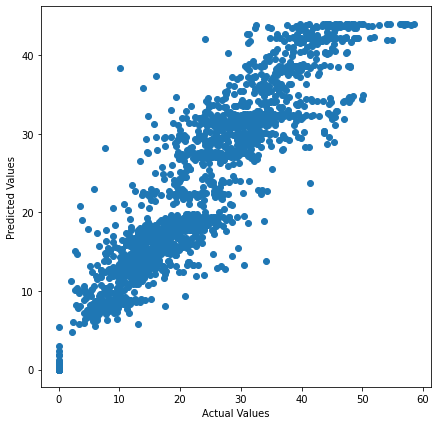

In [ ]:
#Visualizing the accuracy of predicted test data with respect to actual test data
plt.scatter(y_test,y_pred_test2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

From the scatter plot,we can see the linearity of the relationship between Predicted Values and Actual Values which shows high accuracy and increase in variance with respect to testing data.

### ML Model - 3-Polynomial Regression

*Implementation*

In [ ]:

from sklearn.preprocessing import PolynomialFeatures
# ML Model - 3 Implementation

# Defining the variables
dependent_variable = 'Rented Bike Count'
independent_variables = list(set(df_pr.columns[1:].tolist()) - {dependent_variable})

x=df_pr.iloc[:,1:]
y=np.sqrt(df_pr.iloc[:,:1])

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
poly_features = PolynomialFeatures(degree=2) #Initializing the model
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression() 
poly_model.fit(X_train_poly, Y_train) #fitting the model
y_train_predicted = poly_model.predict(X_train_poly) #Predicting the model on train data
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test)) #Predicting the model on test data
#Evaluation of the model
poly_mse_test =mean_squared_error(((Y_test)**2), ((y_test_predict)**2))
poly_mae_test=mean_absolute_error(((Y_test)**2),((y_test_predict)**2))
poly_rmse_test=np.sqrt(poly_mse_test)

*Evaluation*

In [ ]:
 print('MEAN SQUARE ERROR OF TEST DATA : ',poly_mse_test)
 print('MEAN SQUARE ERROR OF ABSOLUTE DATA : ',poly_mae_test)
 print('ROOT MEAN SQUARE ERROR OF TEST DATA : ',poly_rmse_test)

MEAN SQUARE ERROR OF TEST DATA :  105751.98047153906
MEAN SQUARE ERROR OF ABSOLUTE DATA :  214.11170538495895
ROOT MEAN SQUARE ERROR OF TEST DATA :  325.1952958939275


In [ ]:
r2_poly_train=r2_score(((Y_train)**2),((y_train_predicted)**2)) #Evaluation
r2_poly_test=r2_score(((Y_test)**2),((y_test_predict)**2))

In [ ]:
print('r2_score of polynomial_train_data',r2_poly_train)
print('r2_score of polynomial_test_data',r2_poly_test)

r2_score of polynomial_train_data 0.7235101846984888
r2_score of polynomial_test_data 0.7276439061228557


Its R2_Score is quiet acceptable with 72% on test data but lower than the Random Forest Regression Model.

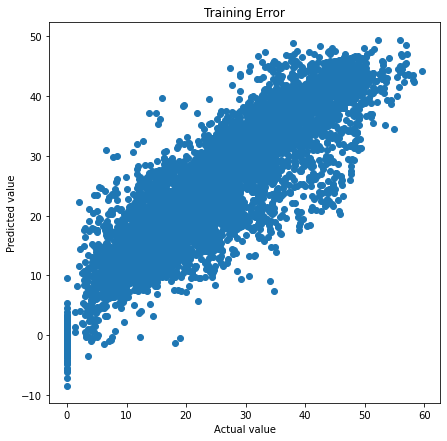

In [ ]:
#Vizualizing the predicted train data with respect to the actual train data
plt.scatter(Y_train,y_train_predicted)
plt.xlabel('Actual value'),plt.ylabel('Predicted value')
plt.title('Training Error')
plt.show()

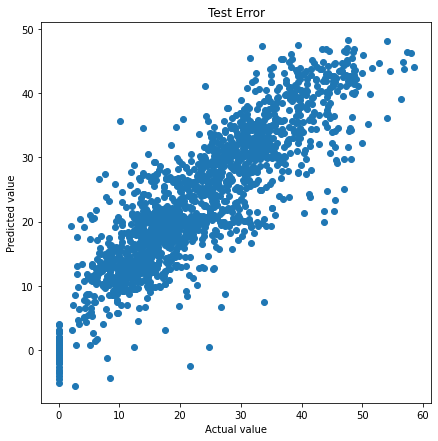

In [ ]:
#Vizualising the predicted test data with respect to the actual test data
plt.scatter(Y_test,y_test_predict)
plt.xlabel('Actual value'),plt.ylabel('Predicted value')
plt.title('Test Error')
plt.show()

From the above Scatter Plot we can visualize the accuracy of the Predicted Values with respect to Actual Values.

<AxesSubplot:ylabel='Density'>

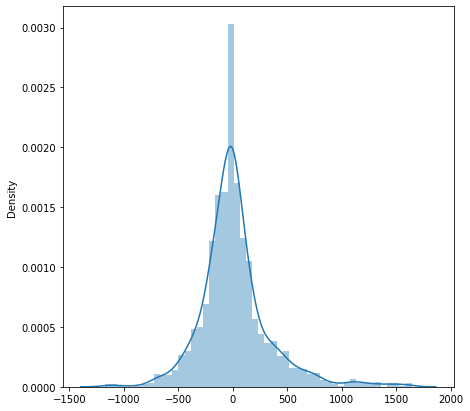

In [ ]:
#Visualizing error density
error_poly=((Y_test)**2)-((y_test_predict)**2)
sns.distplot(error_poly)

In [ ]:

print("Skewness: %f" % error_poly.skew())
print("Kurtosis: %f" % error_poly.kurt())

Skewness: 1.210165
Kurtosis: 4.377536


Here we can see that despite skewness is under acceptable range,its Kurtosis is quiet high.

Here Error density follows the normal distribution

If we compare the R2_Score of the different models,we can see that the Tuned Random Forest Model gives the maximum accuracy with more than 85% while Linear Regression gives minimum accuracy with less than 60%.

# Analysing importance of different features

If we take the best fit model the we have to choose here is Random Forest Model then after we ll try to find the importance of the features.

In [ ]:
#feature importance in tuned random forest classifier
rf_optimal_model=grid_search.best_estimator_
rf_optimal_model

RandomForestRegressor(max_depth=7, n_estimators=80)

In [ ]:
rf_optimal_model.feature_importances_

array([0.26703351, 0.29795749, 0.07281208, 0.00140303, 0.00385532,
       0.03763972, 0.07753007, 0.00051759, 0.00272398, 0.0070653 ,
       0.00049311, 0.05801698, 0.00108671, 0.17186511])

In [ ]:
importances=rf_optimal_model.feature_importances_

In [ ]:
importance_dict = {'Feature' : list(x.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df=importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
importance_df.head(10).reset_index()

index                  Feature  Feature Importance
0      1          Temperature(°C)                0.30
1      0                     Hour                0.27
2     13      Functioning Day_Yes                0.17
3      6             Rainfall(mm)                0.08
4      2              Humidity(%)                0.07
5     11           Seasons_Winter                0.06
6      5  Solar Radiation (MJ/m2)                0.04
7      9           Seasons_Spring                0.01
8      3         Wind speed (m/s)                0.00
9      4         Visibility (10m)                0.00

<AxesSubplot:title={'center':'Feature Importance'}, xlabel='Feature Importance', ylabel='Feature'>

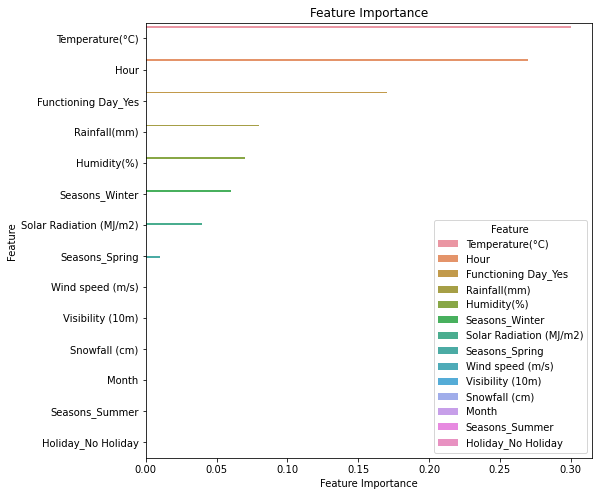

In [ ]:

# visualizing feature importance 
plt.figure(figsize=(8,8))
plt.title('Feature Importance')
sns.barplot(x=importance_df['Feature Importance'],y=importance_df['Feature'],hue=importance_df['Feature'])

From the above bar chart we can see that the Temperature and Time(Hour) play the maximum role in affecting the demand of the Rental Bike.

Here,according to Eli5,Temperature and time have negative contribution  on demand with a higher values.

# Conclusion

During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented 6 machine learning algorithms Linear Regression,lasso,ridge,elasticnet,Random Forest and Polynomial Regression. We did hyperparameter tuning to improve our model performance. The results of our evaluation are:

